In [1]:

# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

from skimage import io

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
import matplotlib.pylab as pylab
file_path = "https://links.uwaterloo.ca/Repository/TIF/lena1.tif"

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

TiffPages: invalid page offset 2290452617


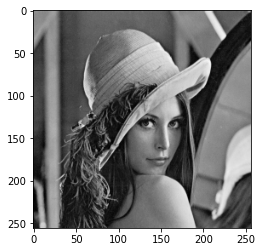

In [2]:

# im = misc.imread("einstein.tif").astype(float)
# im = misc.imread("house.tif").astype(float)

im = io.imread(file_path, True)
# im = misc.imread("barbara.png").astype(float)

f = plt.figure()
plt.imshow(im,cmap='gray')
plt.savefig('lena_original')

In [3]:
imsize = im.shape

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


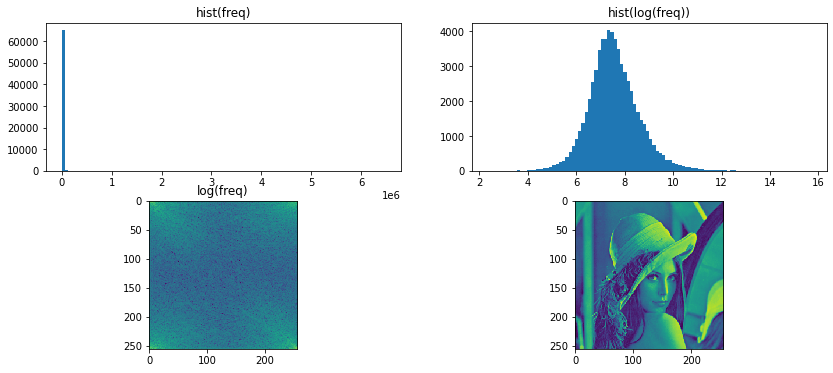

Keeping only 14.843750% of the DFT coefficients


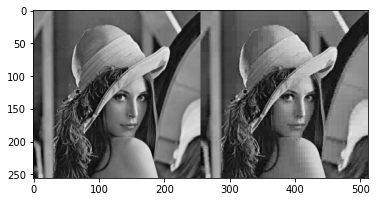

In [4]:
dft = zeros(imsize,dtype='complex');
im_dft = zeros(imsize,dtype='complex');

print(dft)
# 8x8 DFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft2( im[i:(i+8),j:(j+8)] )

# print(dft)
# print(dft.shape, dft.size)


freq = np.fft.fft2(im)
freq = np.abs(freq)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
ax[0,0].hist(freq.ravel(), bins=100)
ax[0,0].set_title('hist(freq)')
plt.savefig('hist_freq')
ax[0,1].hist(np.log(freq).ravel(), bins=100)
ax[0,1].set_title('hist(log(freq))')
plt.savefig('hist(log(freq))')
ax[1,0].imshow(np.log(freq), interpolation="none")
ax[1,0].set_title('log(freq)')
plt.savefig('log(freq)')
ax[1,1].imshow(im, interpolation="none")
plt.savefig('interpolation')
plt.show()
# Thresh
thresh = 0.013
dft_thresh = dft * (abs(dft) > (thresh*np.max(abs(dft))))


percent_nonzeros_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print("Keeping only %f%% of the DFT coefficients" % (percent_nonzeros_dft*100.0))

# 8x8 iDFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dft[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (im,  abs(im_dft)) ) ,cmap='gray')
# plt.imshow(abs(im_dft),cmap='gray')
plt.savefig('compressed')

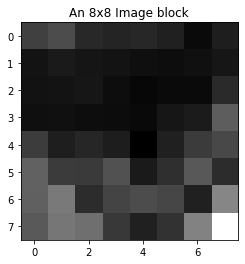

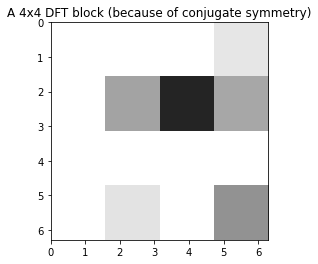

In [6]:

pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")
plt.savefig("8 x 8 image block")

# Display the dct of that block
plt.figure()
plt.imshow(abs(dft[pos:pos+4,pos:pos+4]),cmap='gray',vmax= np.max(abs(dft))*0.01,vmin = 0, extent=[0,2*pi,2*pi,0])
plt.title( "A 4x4 DFT block (because of conjugate symmetry)")
plt.savefig("4 x 4image block")